# Fall 2022 Data Science Intern Challenge 
 
Please complete the following questions, and provide your thought process/work. You can attach your work in a text file, link, etc. on the application page. Please ensure answers are easily visible for reviewers!


## Question 1: Given some sample data, write a program to answer the following: click here to access the required data set

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 




    a)Think about what could be going wrong with our calculation. Think about a better way to evaluate this data
    
    b) What metric would you report for this dataset?
    
    c) What is its value?




## Import libraries

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [40]:
import warnings
warnings.filterwarnings('ignore')

## Open file and EDA

In [41]:
filename =r'../Shopify/2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv'

In [42]:
df = pd.read_csv(filename) 

In [43]:
pd.set_option('display.max_rows', None) #Get to see and scroll all rows from the dataset


In [44]:
df.info() #7 columns, 5000 entries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   order_id        5000 non-null   int64 
 1   shop_id         5000 non-null   int64 
 2   user_id         5000 non-null   int64 
 3   order_amount    5000 non-null   int64 
 4   total_items     5000 non-null   int64 
 5   payment_method  5000 non-null   object
 6   created_at      5000 non-null   object
dtypes: int64(5), object(2)
memory usage: 273.6+ KB


In [45]:
df.head(2)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52


In [46]:

df.duplicated().sum() #no duplicated rows

0

In [47]:
df.isnull().sum() #No null values -THIS WAS ALSO SEEN IN df.info()

order_id          0
shop_id           0
user_id           0
order_amount      0
total_items       0
payment_method    0
created_at        0
dtype: int64

In [48]:
df.shop_id.nunique() #We corroborate we have 100 shops.

100

In [49]:
df.describe().round(2).T #descriptive statistics from dataset

,count,mean,std,min,25%,50%,75%,max
order_id,5000.0,2500.50,1443.52,1.0,1250.75,2500.5,3750.25,5000.0
shop_id,5000.0,50.08,29.01,1.0,24.00,50.0,75.00,100.0
user_id,5000.0,849.09,87.80,607.0,775.00,849.0,925.00,999.0
order_amount,5000.0,3145.13,41282.54,90.0,163.00,284.0,390.00,704000.0
total_items,5000.0,8.79,116.32,1.0,1.00,2.0,3.00,2000.0


The number $3145.13 comes from calculating the mean for the column "order_amount".  
This calculation is the result of the total sum of order_amount, divided by the number of orders.

In [50]:
sum(df.order_amount)/len(df.order_amount)

3145.128

However, this calculation leaves out important information. The standard deviation for **order_amount** is very large(41282.54). 
Simply put, there is too much variation between all the orders. We have a minimum order of \\$90 and a maximum order of \\$70400. Not only this, but two thirds of orders are below \\ $400. 


So one or very few orders distort the mean, by pulling it much higher than it is.

In [51]:
print('Average Order Value:', df['order_amount'].mean(), ',',
      'Median Order Value:', df['order_amount'].median(),'.(This equals to the 50% in the descriptive stats table)','Mode Order Value:', df['order_amount'].mode()) 

Average Order Value: 3145.128 , Median Order Value: 284.0 .(This equals to the 50% in the descriptive stats table) Mode Order Value: 0    153
Name: order_amount, dtype: int64


In [52]:
df.loc[df['order_amount'] == 704000.0]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00
1104,1105,42,607,704000,2000,credit_card,2017-03-24 4:00:00
1362,1363,42,607,704000,2000,credit_card,2017-03-15 4:00:00
1436,1437,42,607,704000,2000,credit_card,2017-03-11 4:00:00
1562,1563,42,607,704000,2000,credit_card,2017-03-19 4:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00
2297,2298,42,607,704000,2000,credit_card,2017-03-07 4:00:00


If we explore further, we find only one customer (607) is responsible for the  \\$704000 orders at shop 42.

The purchases are highly suspicious for several reasons.

    1- Orders several times 2000 pairs of shoes. 

    2- The user places orders at the same time (4:00:00).

    3) More than one order on the same day and hours. For example:
    
  - *order 16* made at 2017-03-07 4:00:00
  - *order 2298*	made also at 2017-03-07 4:00:00
  ______________________
  ______________________
- *order 2836*  made at 2017-03-28 4:00:00	
- *order 2970*	made also at 2017-03-28 4:00:00	

One user can't have two different orders at the same time. And, as we pointed out before, we are talking about $70400 orders. That would mean  \\$140800 spent in one single minute.
User 607 only orders from shop 42.

In [53]:
df.loc[df['user_id'] == 607]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00
1104,1105,42,607,704000,2000,credit_card,2017-03-24 4:00:00
1362,1363,42,607,704000,2000,credit_card,2017-03-15 4:00:00
1436,1437,42,607,704000,2000,credit_card,2017-03-11 4:00:00
1562,1563,42,607,704000,2000,credit_card,2017-03-19 4:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00
2297,2298,42,607,704000,2000,credit_card,2017-03-07 4:00:00


In [54]:
shop42 = df.loc[df['shop_id'] == 42]

In [55]:
shop42.user_id.nunique() #31 users order from the shop. 

31

In [56]:
shop42.describe().T #51 orders. Half the orders are 2 pair of shoes. The price for the shoes is $352

,count,mean,std,min,25%,50%,75%,max
order_id,51.0,2441.921569,1484.456801,16.0,1366.5,2154.0,3801.0,4883.0
shop_id,51.0,42.000000,0.000000,42.0,42.0,42.0,42.0,42.0
user_id,51.0,758.588235,125.993044,607.0,607.0,770.0,863.5,975.0
order_amount,51.0,235101.490196,334860.641587,352.0,352.0,704.0,704000.0,704000.0
total_items,51.0,667.901961,951.308641,1.0,1.0,2.0,2000.0,2000.0


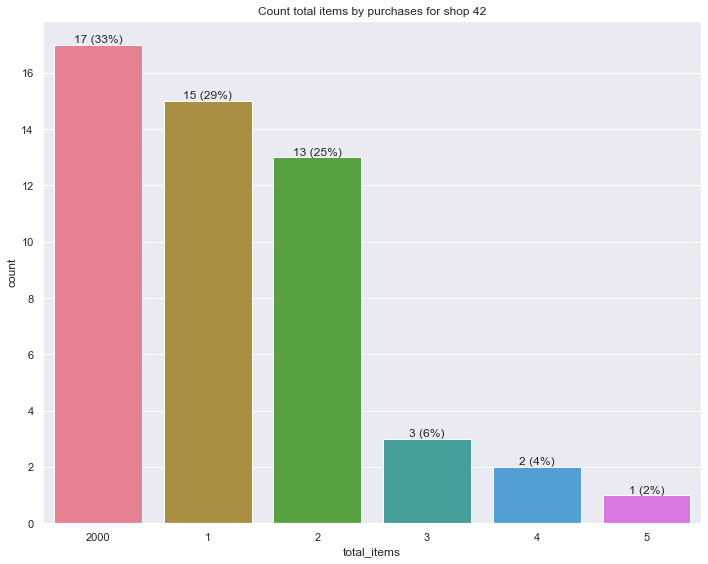

In [57]:
ax = sns.countplot(x=shop42['total_items'],
                   order=shop42['total_items'].value_counts(ascending=False).index, palette="husl");
        
abs_values = shop42['total_items'].value_counts(ascending=False)
rel_values = shop42['total_items'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]


ax.bar_label(container=ax.containers[0], labels=lbls)
title =plt.title("Count total items by purchases for shop 42")
sns.set(rc={'figure.figsize':(9,6)})

plt.tight_layout()
plt.show()

33\% of the purchases are made by the user 607 (We know it is the only one placing orders for 2000 pairs of shoes).

## Do any other shops get such high orders?

In [58]:
total2000 = df.loc[df['total_items'] == 2000]
total2000.nunique()

order_id          17
shop_id            1
user_id            1
order_amount       1
total_items        1
payment_method     1
created_at        12
dtype: int64

We confirm one user is responsible for all the orders at one store. Multiple orders were placed at the same time (Created at ≠ number orders)").

In [59]:
shop42.sort_values(by="user_id", ascending=False)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
3903,3904,42,975,352,1,debit,2017-03-12 1:28:31
2766,2767,42,970,704,2,credit_card,2017-03-05 10:45:42
4231,4232,42,962,352,1,cash,2017-03-04 0:01:19
2053,2054,42,951,352,1,debit,2017-03-19 11:49:12
1512,1513,42,946,352,1,debit,2017-03-24 13:35:04
2003,2004,42,934,704,2,cash,2017-03-26 9:21:26
1367,1368,42,926,1408,4,cash,2017-03-13 2:38:34
1471,1472,42,907,1408,4,debit,2017-03-12 23:00:22
409,410,42,904,704,2,credit_card,2017-03-04 14:32:58
3998,3999,42,886,352,1,debit,2017-03-09 20:10:41


Other orders are also suspicious, for example, the same user buying every few days, sometimes in cash, sometimes by card. It is better to take this shop out of our calculation for a more representative picture.

## How many items are purchased? Do we have wholesale stores?

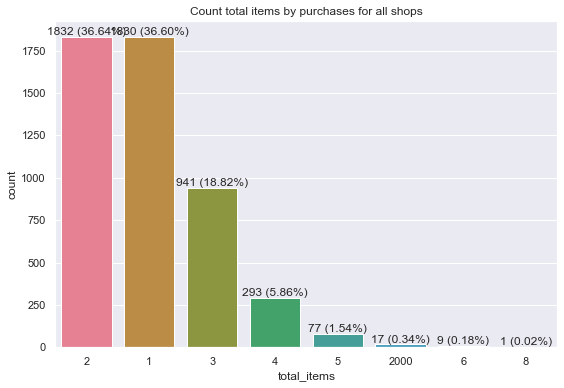

In [60]:
ax = sns.countplot(x=df['total_items'],
                   order=df['total_items'].value_counts(ascending=False).index, palette="husl");
        
abs_values = df['total_items'].value_counts(ascending=False)
rel_values = df['total_items'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.02f}%)' for p in zip(abs_values, rel_values)]


ax.bar_label(container=ax.containers[0], labels=lbls)
title =plt.title("Count total items by purchases for all shops")

sns.set(rc={'figure.figsize':(12,10)})

plt.show()

73% of orders are 1-2 pairs of shoes. 92.06% is less than 4. We see the orders from user 607 represent 0.34% of all purchases. 


## What is the average price for a pair of shoes?

In [61]:
AVG =(df.order_amount)/(df.total_items)

AVG.nunique()

58

In [62]:
# Create a price per pair of shoes for every order.
df['price_sneaker'] = df['order_amount']/df['total_items']

In [63]:
pd.DataFrame(df['price_sneaker'].describe()).T

,count,mean,std,min,25%,50%,75%,max
price_sneaker,5000.0,387.7428,2441.963725,90.0,133.0,153.0,169.0,25725.0


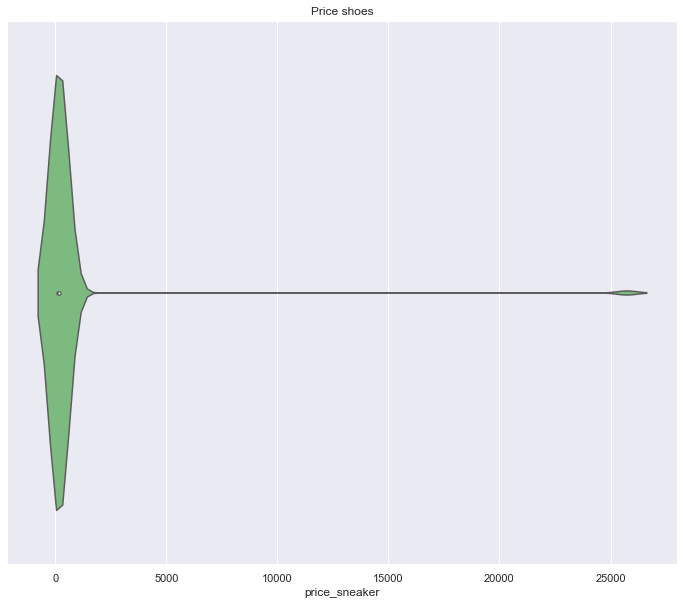

In [64]:
ax = sns.violinplot(x=df['price_sneaker'],palette="Greens")
title =plt.title("Price shoes")
sns.set(rc={'figure.figsize':(10,8)})


In [65]:
df.loc[df['price_sneaker'] == 25725.0]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,price_sneaker
160,161,78,990,25725,1,credit_card,2017-03-12 5:56:57,25725.0
490,491,78,936,51450,2,debit,2017-03-26 17:08:19,25725.0
493,494,78,983,51450,2,cash,2017-03-16 21:39:35,25725.0
511,512,78,967,51450,2,cash,2017-03-09 7:23:14,25725.0
617,618,78,760,51450,2,cash,2017-03-18 11:18:42,25725.0
691,692,78,878,154350,6,debit,2017-03-27 22:51:43,25725.0
1056,1057,78,800,25725,1,debit,2017-03-15 10:16:45,25725.0
1193,1194,78,944,25725,1,debit,2017-03-16 16:38:26,25725.0
1204,1205,78,970,25725,1,credit_card,2017-03-17 22:32:21,25725.0
1259,1260,78,775,77175,3,credit_card,2017-03-27 9:27:20,25725.0


We see one outlier. It is Shop 78 that charges \\$2575 for a pair of shoes. This price is far away from 75\% of the shops charging below \\$200. It is also suspicious of fraud.

In [66]:
shop90= df.loc[df['price_sneaker'] == 90.0]
shop90.describe().T.round(2) #only one shop charges $90

,count,mean,std,min,25%,50%,75%,max
order_id,42.0,2449.14,1711.96,2.0,690.75,2343.5,4117.00,4974.0
shop_id,42.0,92.00,0.00,92.0,92.00,92.0,92.00,92.0
user_id,42.0,865.10,77.30,729.0,818.50,856.0,934.25,987.0
order_amount,42.0,162.86,87.19,90.0,90.00,180.0,180.00,450.0
total_items,42.0,1.81,0.97,1.0,1.00,2.0,2.00,5.0
price_sneaker,42.0,90.00,0.00,90.0,90.00,90.0,90.00,90.0


In [67]:
df_cleaned = (df[df['shop_id']!=42])
df_cleaned= (df_cleaned[df_cleaned['shop_id']!=78])
df_cleaned.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,4903.0,2499.584540,1444.221163,1.0,1246.5,2499.0,3750.5,5000.0
shop_id,4903.0,49.900877,29.154367,1.0,24.0,50.0,74.0,100.0
user_id,4903.0,849.858862,86.887947,700.0,776.0,850.0,925.0,999.0
order_amount,4903.0,300.155823,155.941112,90.0,163.0,284.0,386.5,1086.0
total_items,4903.0,1.995717,0.982602,1.0,1.0,2.0,3.0,8.0
price_sneaker,4903.0,150.400163,23.851202,90.0,132.0,153.0,166.0,201.0


In [68]:
df_cleaned["order_amount"].mode()

0    153
Name: order_amount, dtype: int64

In [69]:
df_cleaned["total_items"].mode()

0    2
Name: total_items, dtype: int64

In [70]:
df_cleaned["price_sneaker"].mode()

0    153.0
Name: price_sneaker, dtype: float64

In [71]:
sum(df_cleaned["order_amount"])/sum(df_cleaned["total_items"])

150.4

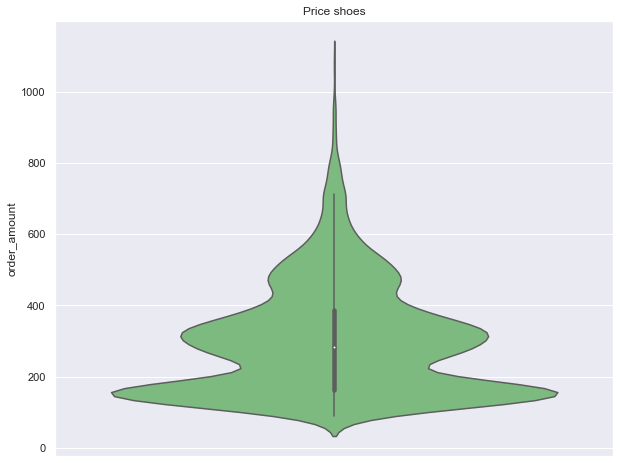

In [72]:
ax = sns.violinplot(y=df_cleaned['order_amount'],palette="Greens")
title =plt.title("Price shoes")
sns.set(rc={'figure.figsize':(10,8)})





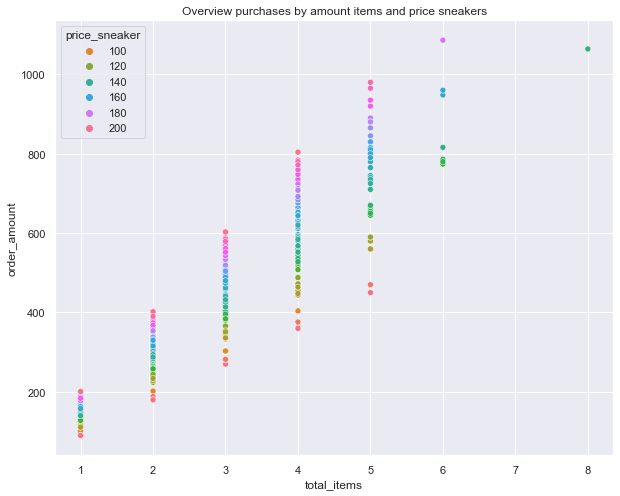

In [73]:
sns.scatterplot(data=df_cleaned, x="total_items", y="order_amount", hue="price_sneaker", palette="husl")
title =plt.title("Overview purchases by amount items and price sneakers") #overview purchases 

### How many other shops have orders higher that \\$400 

In [74]:
more400 =df_cleaned.loc[df['order_amount'] > 400].sort_values(by="order_amount",ascending=False) 
more400.sort_values(by="user_id").head(10) #delete .head(10) to see all rows

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,price_sneaker
282,283,71,700,492,3,cash,2017-03-26 4:43:59,164.0
3689,3690,38,700,570,3,cash,2017-03-08 3:34:47,190.0
1353,1354,50,700,579,3,cash,2017-03-07 18:00:23,193.0
4059,4060,100,701,444,4,debit,2017-03-01 7:14:05,111.0
3452,3453,47,701,435,3,debit,2017-03-07 14:18:08,145.0
999,1000,13,701,480,3,credit_card,2017-03-27 5:50:09,160.0
4452,4453,87,701,447,3,credit_card,2017-03-21 2:21:43,149.0
3597,3598,59,701,712,4,debit,2017-03-23 21:44:30,178.0
3995,3996,51,701,561,3,debit,2017-03-16 1:15:13,187.0
4843,4844,43,701,543,3,cash,2017-03-01 9:56:42,181.0


# Summary analysis
To summarize, one should use more than one metric to analyze the data.

        - Check the mode (most common value), median (50% of the data), and mean together. 
        - Check for outliers that distort the calculations (values outside the interquartile range). Corroborate if outliers are fraudulent purchases.
        

For our analysis, the most common price is \\$153 per sneaker; users mostly buy two pairs of shoes, and the most common order amount is \\$153. 


# Question 2: 


For this question you’ll need to use SQL. Follow this link to access the data set required for the challenge. Please use queries to answer the following questions. Paste your queries along with your final numerical answers below.


## A) How many orders were shipped by Speedy Express in total?


    SELECT Shippers.ShipperName, COUNT(Orders.OrderID) AS NumberOrders FROM Orders
    LEFT JOIN Shippers ON Orders.ShipperID = Shippers.ShipperID
    GROUP BY ShipperName;

**SOLUTION: Speedy Express -54**




## B) What is the last name of the employee with the most orders?


    SELECT Employees.LastName, COUNT(Orders.OrderID) AS NumberOrders FROM Orders
    LEFT JOIN Employees ON Orders.EmployeeID = Employees.EmployeeID
    GROUP BY LastName
    ORDER BY COUNT(Orders.OrderID) DESC;
    
 **SOLUTION: Peacock 	40**

##  C) What product was ordered the most by customers in Germany?
    
    SELECT Products.ProductName, SUM(Quantity) AS TotalOrdersGermany FROM OrderDetails
    LEFT JOIN Products ON OrderDetails.ProductID = Products.ProductID
    WHERE OrderID IN (
    SELECT OrderID FROM Orders
    WHERE CustomerID IN (SELECT CustomerID FROM Customers
    WHERE Country = 'Germany'))
    GROUP BY ProductName
    Order BY SUM(Quantity)  DESC ;

**SOLUTION: Boston Crab Meat 	160**
